In [2]:
%load_ext autoreload
%autoreload 2

from string import ascii_uppercase as ABC

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

from remeta.plot import set_fontsize
from remeta.plot import _logistic, _normal
from remeta.transform import compute_nonlinear_encoding as nonlinear_encoding

In [2]:
type1_noise_dist = 'normal'
# type1_noise_dist = 'logistic'
cdf = _normal if type1_noise_dist == 'normal' else _logistic

In [3]:
params = dict(
    type1_noise=0.4,
    type1_thresh=0,
    type1_bias=0,
    type1_nonlinear_gain=0,
    type1_nonlinear_transition=1
)

params_sweep = [
    dict(type1_bias=[0.4, 0.2, 0, -0.2, -0.4]),
    dict(type1_thresh=[0.1, 0.3]),
    dict(type1_bias=[0.1, -0.1], type1_thresh=[0.1, 0.1]),
    dict(type1_noise=[0.1, 0.2, 0.4, 0.8, 1.6]),
    dict(type1_nonlinear_gain=[-0.8, -0.5, 0, 2, 8]),
    dict(type1_nonlinear_transition=[0.1, 1, 2])
]

titles = [
    r'Type 1 bias $\delta_1$',
    r'Type 1 threshold $\vartheta_1$',
    r'Type 1 bias $\delta_1$ + type 1 threshold $\vartheta_1$',
    r'Type 1 noise $\sigma_1$',
    r'Type 1 nonlinear gain $\kappa_1$',
    r'Type 1 nonlinear transition $\tau_1$'
]

symbols = [r'$\delta_1$', r'$\vartheta_1$', r'$\delta_1$', r'$\sigma_1$', r'$\kappa_1$', r'$\tau_1$']
other_symbols = [
    'Other:\n' + rf"$\sigma_1={params['type1_noise']}$" + '\n' + rf"$\vartheta_1={params['type1_thresh']}$",
    'Other:\n' + rf"$\sigma_1={params['type1_noise']}$" + '\n' + rf"$\delta_1={params['type1_bias']}$",
    'Other:\n' + rf"$\sigma_1={params['type1_noise']}$" + '\n' + rf"$\vartheta_1={0.1}$",
    'Other:\n' + rf"$\delta_1={params['type1_bias']}$" + '\n' + rf"$\vartheta_1={params['type1_thresh']}$",
    'Other:\n' + rf"$\sigma_1={params['type1_noise']}$" + '\n' + rf"$\delta_1={params['type1_bias']}$" + '\n' + rf"$\vartheta_1={params['type1_thresh']}$" + '\n' + rf"$\tau_1={params['type1_nonlinear_transition']}$",
    'Other:\n' + rf"$\sigma_1={params['type1_noise']}$" + '\n' + rf"$\delta_1={params['type1_bias']}$" + '\n' + rf"$\vartheta_1={params['type1_thresh']}$" + '\n' + rf"$\kappa_1={params['type1_nonlinear_gain']}$"
]

cmap = LinearSegmentedColormap.from_list('bg', [(0.8, 0.3, 0.3), (0.3, 0.3, 0.3), (0.3, 0.3, 0.8)], N=5)
colors = [(0, 0.5, 0.64), (0.28, 0.22, 0.64)]

x = np.arange(-1, 1, 0.01)

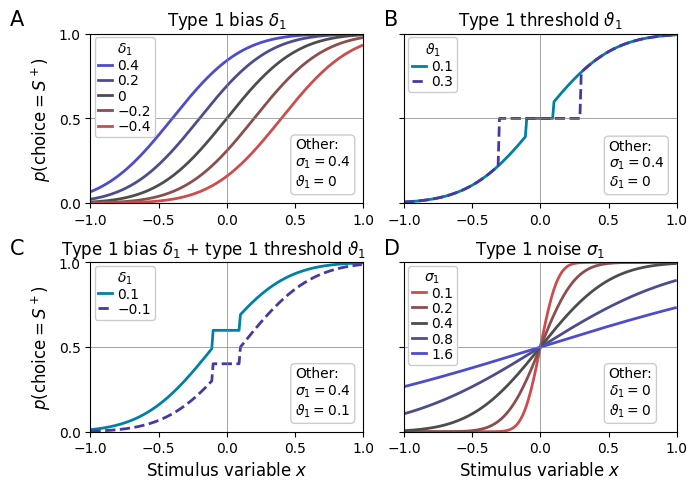

In [4]:
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)

    nvalues = len(params_sweep[i][list(params_sweep[i].keys())[0]])

    for j in range(nvalues):
        params_ = {**params, **{k: v[j] for k, v in params_sweep[i].items()}}
        y = cdf(x, params_['type1_noise'], params_['type1_thresh'], params_['type1_bias'])
        plt.plot(x, y, lw=2, color=(cmap(nvalues-j-1) if i == 0 else cmap(j)) if i in (0, 3) else colors[j],
                 linestyle='--' if i in (1, 2) and (j==1) else '-', label=str(params_sweep[i][list(params_sweep[i].keys())[0]][j]).replace('-', '−'))

    plt.plot([-1, 1], [0.5, 0.5], '-', lw=0.5, color=[0.5, 0.5, 0.5])
    plt.plot([0, 0], [-0.02, 1.02], '-', lw=0.5, color=[0.5, 0.5, 0.5])

    plt.legend(title=symbols[i], bbox_to_anchor=(-0.01, 1.02), loc='upper left', framealpha=1, labelspacing=0.09, handlelength=1, handletextpad=0.4, columnspacing=0.3, borderpad=0.25)
    plt.annotate(other_symbols[i], xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(fc=[1, 1, 1], ec=[0.8, 0.8, 0.8], lw=1, boxstyle='round,rounding_size=0.3'))

    plt.xlim((-1, 1))
    plt.ylim((-0.02, 1.02))
    xticks = np.arange(-1, 1.01, 0.5)
    yticks = np.arange(0, 1.1, 0.5)
    if i < 2:
        plt.xticks(xticks)
    else:
        plt.xlabel('Stimulus variable $x$')
        plt.xticks(xticks)
    if np.mod(i, 2) == 0:
        plt.ylabel(r'$p(\mathrm{choice} = S^+)$')
        plt.yticks(yticks)
    else:
        plt.yticks(yticks, [])
    set_fontsize(label=12, tick=10)

    plt.title(titles[i], x=0.45 if i == 2 else 0.5)
    plt.ylim((0, 1))
    plt.text((-0.075, -0.295)[int(np.mod(i, 2) == 0)], 1.05, ABC[i], transform=plt.gca().transAxes, color=(0, 0, 0), fontsize=15)

plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.savefig('../content/img/type1_parameters.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

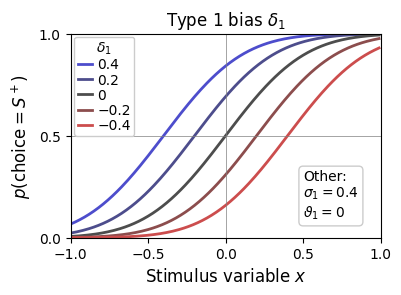

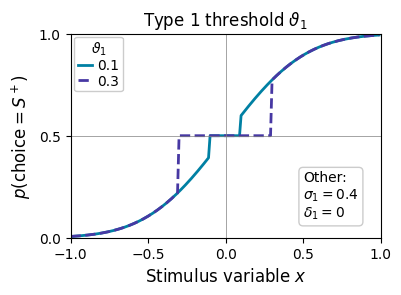

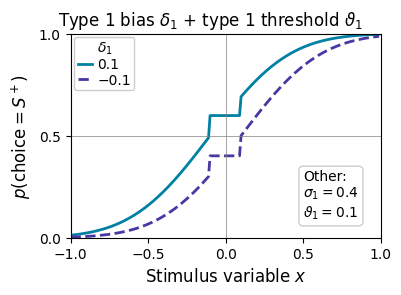

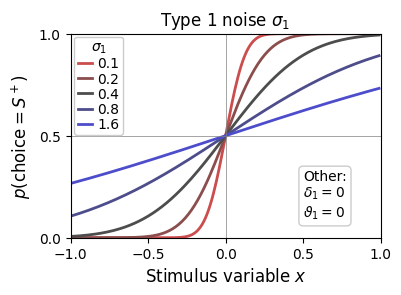

In [5]:
names = ['bias', 'thresh', 'bias_thresh', 'noise']
for i in range(4):
    plt.figure(figsize=(4, 2.65))

    nvalues = len(params_sweep[i][list(params_sweep[i].keys())[0]])

    for j in range(nvalues):
        params_ = {**params, **{k: v[j] for k, v in params_sweep[i].items()}}
        y = cdf(x, params_['type1_noise'], params_['type1_thresh'], params_['type1_bias'])
        plt.plot(x, y, lw=2, color=(cmap(nvalues-j-1) if i == 0 else cmap(j)) if i in (0, 3) else colors[j],
                 linestyle='--' if i in (1, 2) and (j==1) else '-', label=str(params_sweep[i][list(params_sweep[i].keys())[0]][j]).replace('-', '−'))

    plt.plot([-1, 1], [0.5, 0.5], '-', lw=0.5, color=[0.5, 0.5, 0.5])
    plt.plot([0, 0], [-0.02, 1.02], '-', lw=0.5, color=[0.5, 0.5, 0.5])

    plt.legend(title=symbols[i], bbox_to_anchor=(-0.01, 1.02), loc='upper left', framealpha=1, labelspacing=0.09, handlelength=1, handletextpad=0.4, columnspacing=0.3, borderpad=0.25)
    plt.annotate(other_symbols[i], xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(fc=[1, 1, 1], ec=[0.8, 0.8, 0.8], lw=1, boxstyle='round,rounding_size=0.3'))

    plt.xlim((-1, 1))
    plt.ylim((-0.02, 1.02))
    xticks = np.arange(-1, 1.01, 0.5)
    yticks = np.arange(0, 1.1, 0.5)
    plt.xlabel('Stimulus variable $x$')
    plt.xticks(xticks)
    plt.ylabel(r'$p(\mathrm{choice} = S^+)$')
    plt.yticks(yticks)
    set_fontsize(label=12, tick=10)

    plt.title(titles[i], x=0.45 if i == 2 else 0.5)
    plt.ylim((0, 1))

    plt.subplots_adjust(hspace=0.35, wspace=0.15)
    plt.savefig(f'../content/img/type1_parameters_{names[i]}.png', bbox_inches='tight', pad_inches=0.02)
    plt.show()

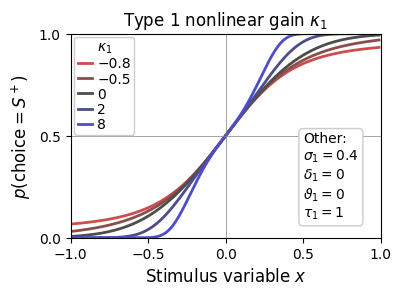

In [6]:
plt.figure(figsize=(4, 2.65))

i = 4

nvalues = len(params_sweep[i][list(params_sweep[i].keys())[0]])

for j in range(nvalues):
    params_ = {**params, **{k: v[j] for k, v in params_sweep[i].items()}}
    y = cdf(nonlinear_encoding(x, type1_nonlinear_gain=params_sweep[i]['type1_nonlinear_gain'][j]), params_['type1_noise'], params_['type1_thresh'], params_['type1_bias'])
    plt.plot(x, y, lw=2, color=cmap(j),
             linestyle='--' if i in (1, 2) and (j==1) else '-', label=str(params_sweep[i][list(params_sweep[i].keys())[0]][j]).replace('-', '−'))

plt.plot([-1, 1], [0.5, 0.5], '-', lw=0.5, color=[0.5, 0.5, 0.5])
plt.plot([0, 0], [-0.02, 1.02], '-', lw=0.5, color=[0.5, 0.5, 0.5])

plt.legend(title=symbols[i], bbox_to_anchor=(-0.01, 1.02), loc='upper left', framealpha=1, labelspacing=0.09, handlelength=1, handletextpad=0.4, columnspacing=0.3, borderpad=0.25)
plt.annotate(other_symbols[i], xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(fc=[1, 1, 1], ec=[0.8, 0.8, 0.8], lw=1, boxstyle='round,rounding_size=0.3'))

plt.xlim((-1, 1))
plt.ylim((-0.02, 1.02))
xticks = np.arange(-1, 1.01, 0.5)
yticks = np.arange(0, 1.1, 0.5)
plt.xlabel('Stimulus variable $x$')
plt.xticks(xticks)
plt.ylabel(r'$p(\mathrm{choice} = S^+)$')
plt.yticks(yticks)
set_fontsize(label=12, tick=10)

plt.title(titles[i], x=0.45 if i == 2 else 0.5)
plt.ylim((0, 1))

plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.savefig(f'../content/img/type1_parameters_nonlinear_gain.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

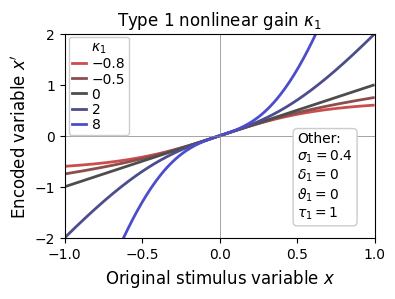

In [7]:
def plot_nonlinear_gain():
    i = 4

    nvalues = len(params_sweep[i][list(params_sweep[i].keys())[0]])

    for j in range(nvalues):
        y = nonlinear_encoding(x, type1_nonlinear_gain=params_sweep[i]['type1_nonlinear_gain'][j])
        plt.plot(x, y, lw=2, color=cmap(j),
                 linestyle='--' if i in (1, 2) and (j==1) else '-', label=str(params_sweep[i][list(params_sweep[i].keys())[0]][j]).replace('-', '−'))

    plt.plot([-1, 1], [0, 0], '-', lw=0.5, color=[0.5, 0.5, 0.5])
    plt.plot([0, 0], [-2, 2], '-', lw=0.5, color=[0.5, 0.5, 0.5])

    plt.legend(title=symbols[i], bbox_to_anchor=(-0.01, 1.02), loc='upper left', framealpha=1, labelspacing=0.09, handlelength=1, handletextpad=0.4, columnspacing=0.3, borderpad=0.25)
    plt.annotate(other_symbols[i], xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(fc=[1, 1, 1], ec=[0.8, 0.8, 0.8], lw=1, boxstyle='round,rounding_size=0.3'))

    plt.xlim((-1, 1))
    xticks = np.arange(-1, 1.01, 0.5)
    # yticks = np.arange(0, 1.1, 0.5)
    plt.xlabel('Original stimulus variable $x$')
    plt.xticks(xticks)
    plt.ylabel("Encoded variable $x'$")
    # plt.yticks(yticks)
    set_fontsize(label=12, tick=10)

    plt.title(titles[i], x=0.45 if i == 2 else 0.5)
    plt.ylim((-2, 2))

plt.figure(figsize=(4, 2.65))
plot_nonlinear_gain()
plt.savefig(f'../content/img/type1_parameters_nonlinear_gain_stimtrans.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

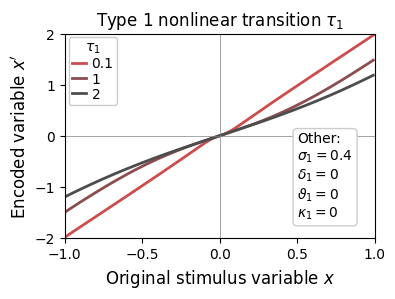

In [8]:
def plot_nonlinear_transition():

    i = 5

    nvalues = len(params_sweep[i][list(params_sweep[i].keys())[0]])

    for j in range(nvalues):
        y = nonlinear_encoding(x, type1_nonlinear_gain=1, type1_nonlinear_scale=params_sweep[i]['type1_nonlinear_transition'][j])
        plt.plot(x, y, lw=2, color=cmap(j),
                 linestyle='--' if i in (1, 2) and (j==1) else '-', label=str(params_sweep[i][list(params_sweep[i].keys())[0]][j]).replace('-', '−'))

    plt.plot([-1, 1], [0, 0], '-', lw=0.5, color=[0.5, 0.5, 0.5])
    plt.plot([0, 0], [-2, 2], '-', lw=0.5, color=[0.5, 0.5, 0.5])

    plt.legend(title=symbols[i], bbox_to_anchor=(-0.01, 1.02), loc='upper left', framealpha=1, labelspacing=0.09, handlelength=1, handletextpad=0.4, columnspacing=0.3, borderpad=0.25)
    plt.annotate(other_symbols[i], xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(fc=[1, 1, 1], ec=[0.8, 0.8, 0.8], lw=1, boxstyle='round,rounding_size=0.3'))

    plt.xlim((-1, 1))
    xticks = np.arange(-1, 1.01, 0.5)
    # yticks = np.arange(0, 1.1, 0.5)
    plt.xlabel('Original stimulus variable $x$')
    plt.xticks(xticks)
    plt.ylabel("Encoded variable $x'$")
    # plt.yticks(yticks)
    set_fontsize(label=12, tick=10)

    plt.title(titles[i], x=0.45 if i == 2 else 0.5)
    plt.ylim((-2, 2))

plt.figure(figsize=(4, 2.65))
plot_nonlinear_transition()
plt.savefig(f'../content/img/type1_parameters_nonlinear_transition_stimtrans.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

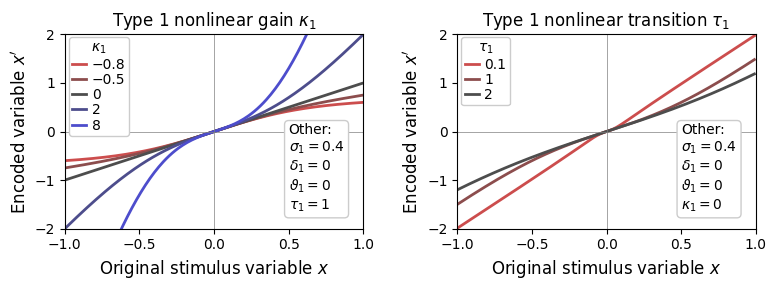

In [9]:
plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_nonlinear_gain()
plt.subplot(122)
plot_nonlinear_transition()
plt.tight_layout()
plt.savefig(f'../content/img/type1_parameters_nonlinear_stimtrans.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

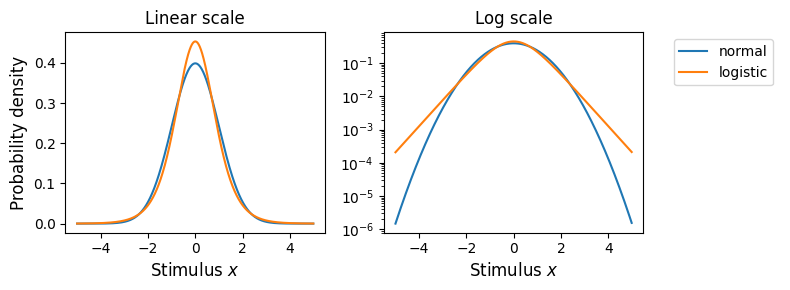

In [16]:
from scipy.stats import logistic, norm
fig = plt.figure(figsize=(8, 3))
gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[1, 1, 0.3])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax_legend = fig.add_subplot(gs[0, 2])

plt.sca(ax1)
x = np.arange(-5, 5, 0.01)
plt.plot(x, norm.pdf(x))
plt.plot(x, logistic.pdf(x, scale=np.sqrt(3)/np.pi))
plt.xlabel('Stimulus $x$')
plt.ylabel('Probability density')
plt.title('Linear scale')

plt.sca(ax2)
x = np.arange(-5, 5, 0.01)
line_normal = plt.plot(x, norm.pdf(x), label='normal')[0]
line_logistic = plt.plot(x, logistic.pdf(x, scale=np.sqrt(3)/np.pi), label='logistic')[0]
plt.yscale('log')
plt.xlabel('Stimulus $x$')
plt.title('Log scale')

plt.sca(ax_legend)
plt.axis('off')
plt.legend(handles=[line_normal, line_logistic])

set_fontsize(label=12, tick=10)
plt.tight_layout()
plt.savefig(f'../content/img/normal_versus_logistic.png', bbox_inches='tight', pad_inches=0.02)
plt.show()